In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble,tree,linear_model
plt.style.use('classic')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test_Id=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

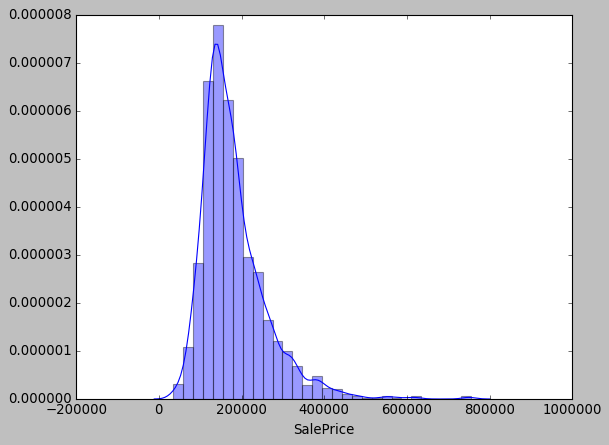

In [5]:
sns.distplot(train['SalePrice'],bins=30)

In [6]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [7]:
date_features= [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]

for feature in date_features:
    print(feature,train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

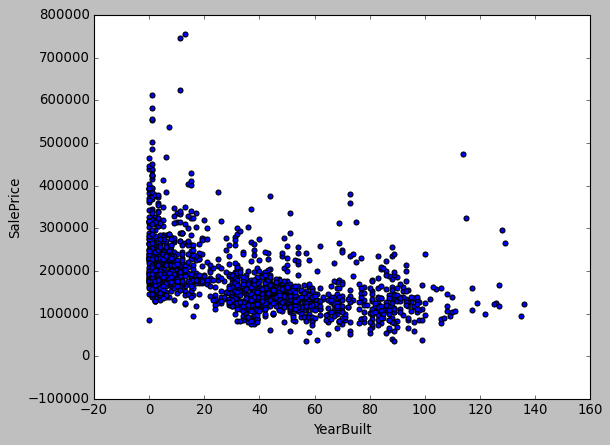

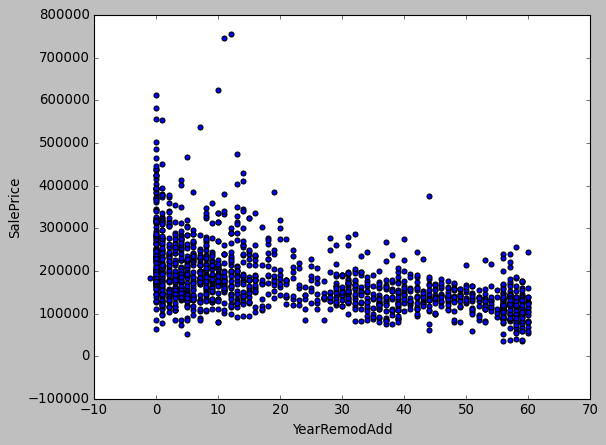

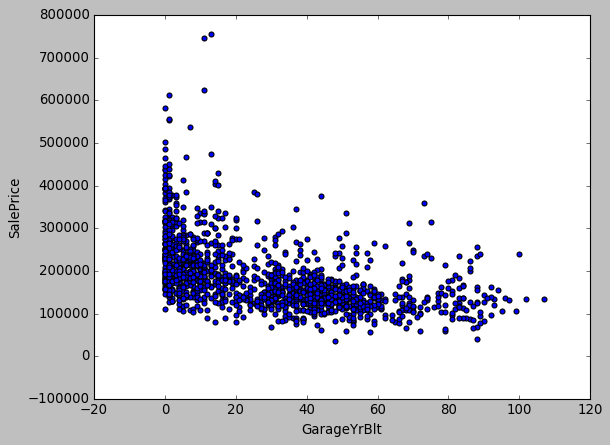

In [8]:
for feature in date_features:
    if feature != 'YrSold':
        data=train.copy()
        plt.scatter(x=(data['YrSold'] - data[feature]), y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [9]:
discrete_features = [feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in date_features +['Id']]

train[discrete_features].head(3)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9


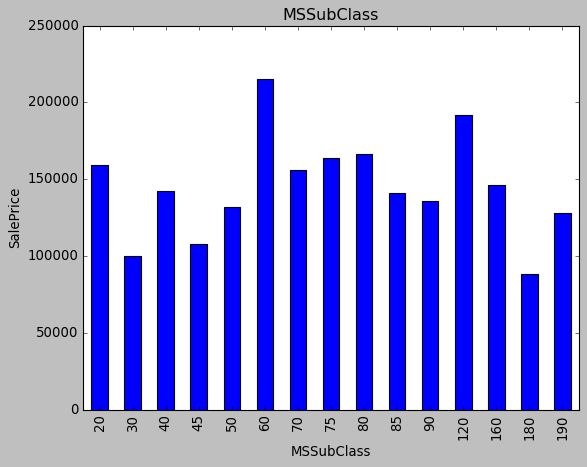

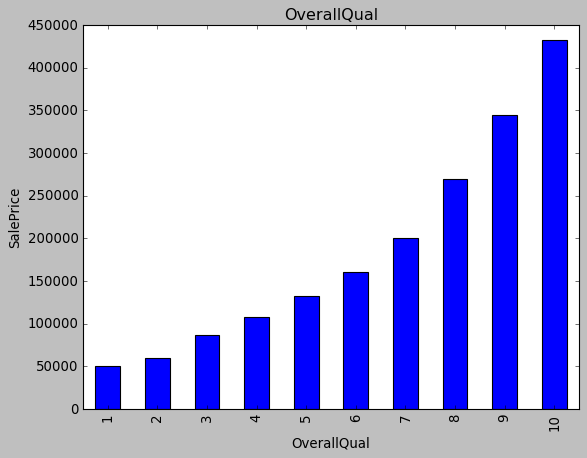

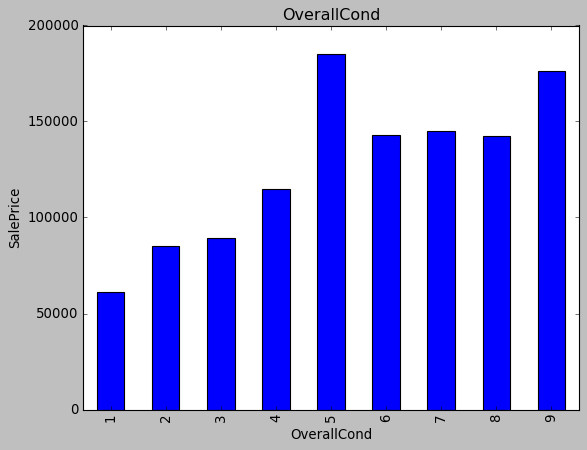

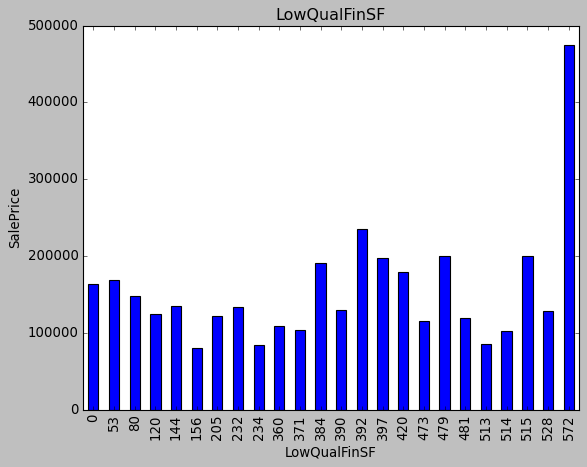

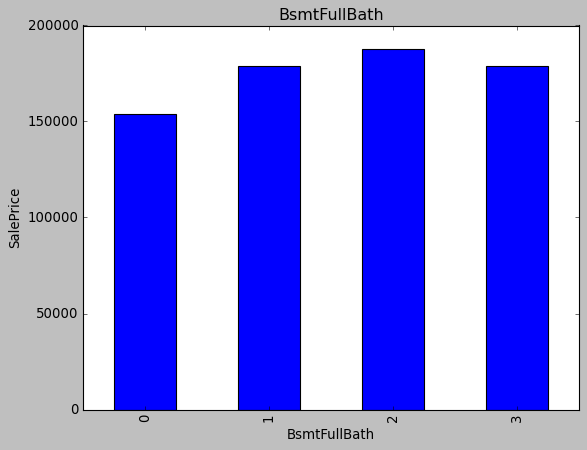

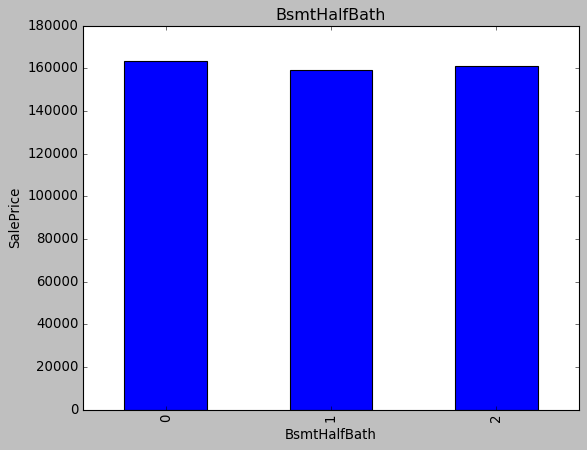

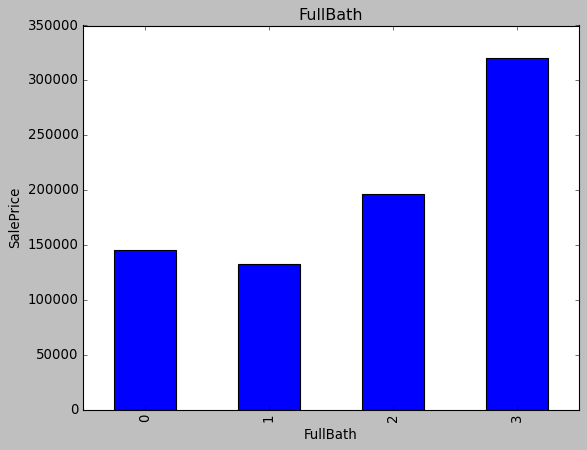

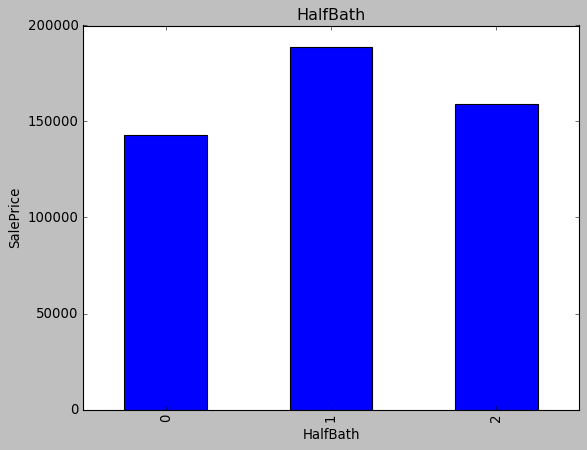

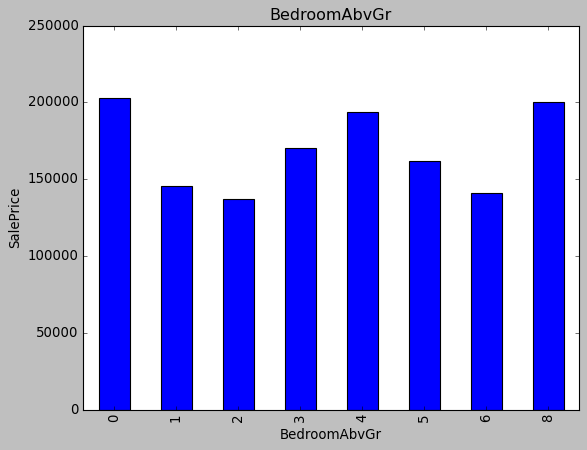

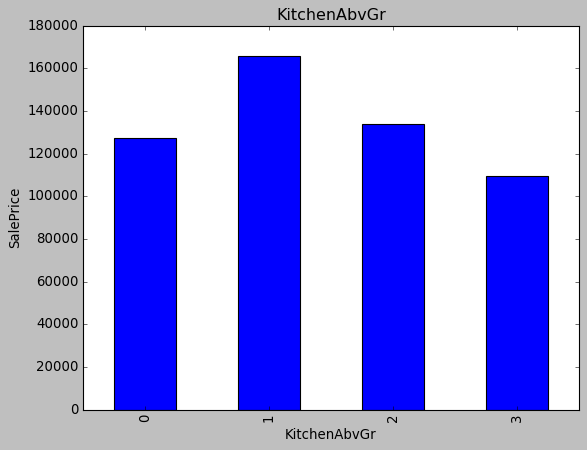

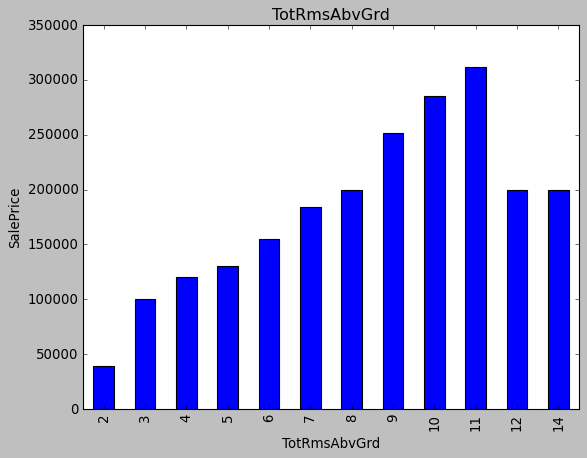

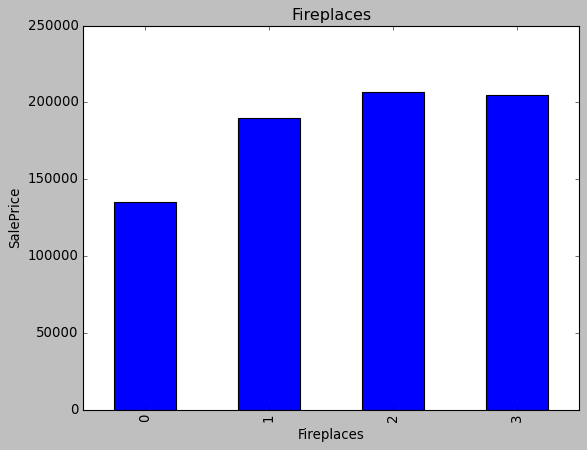

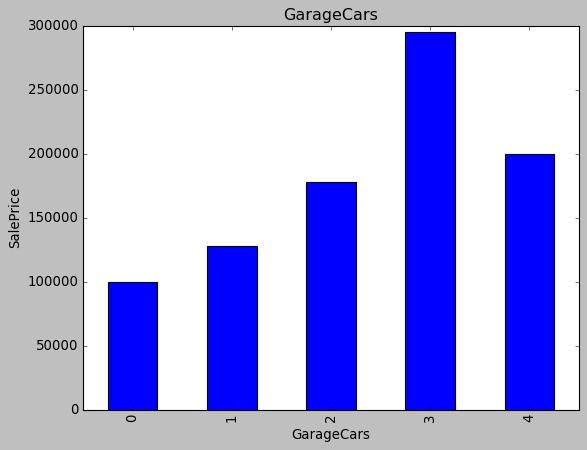

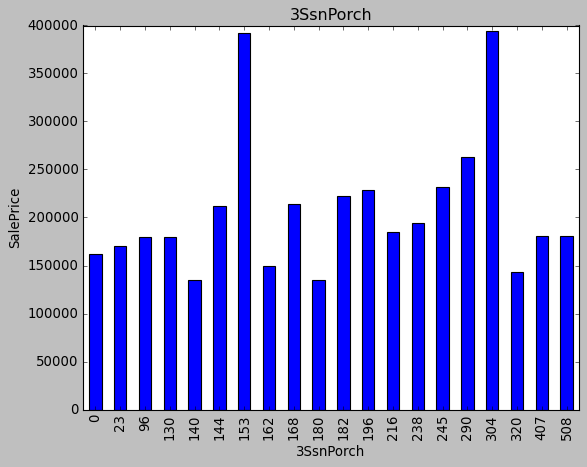

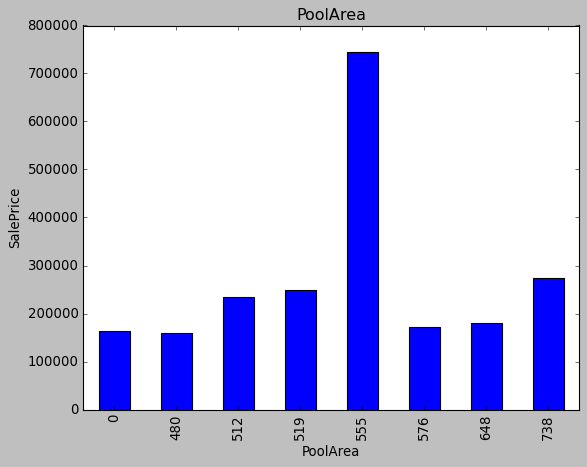

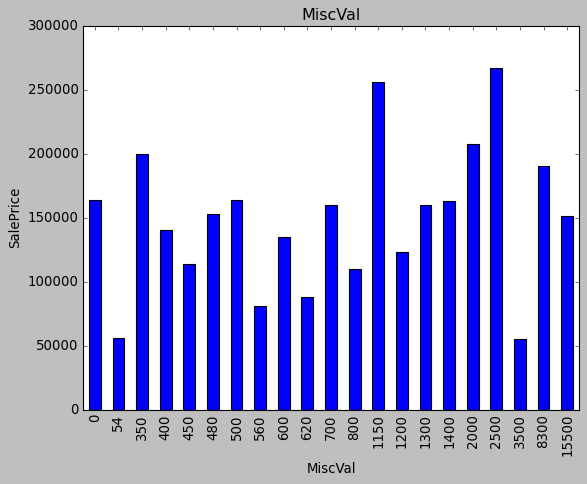

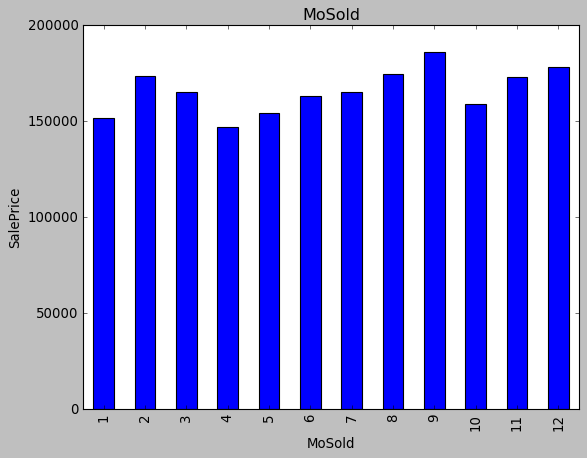

In [10]:
for feature in discrete_features:
    data=train.copy(feature)
    data=data.groupby(feature)['SalePrice']
    data.median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [11]:
continuos_features = [feature for feature in numeric_features if feature not in date_features + discrete_features + ['Id']]

print(len(continuos_features))

16


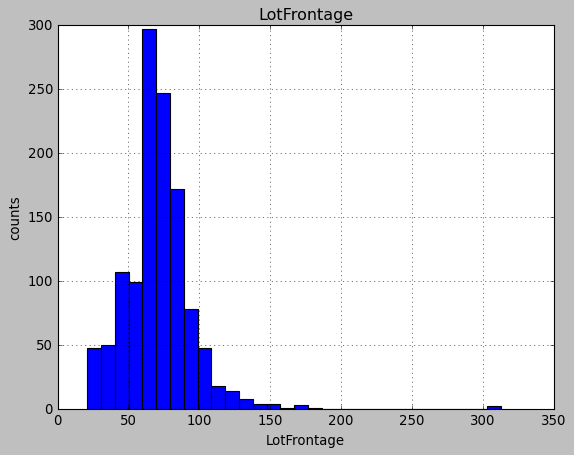

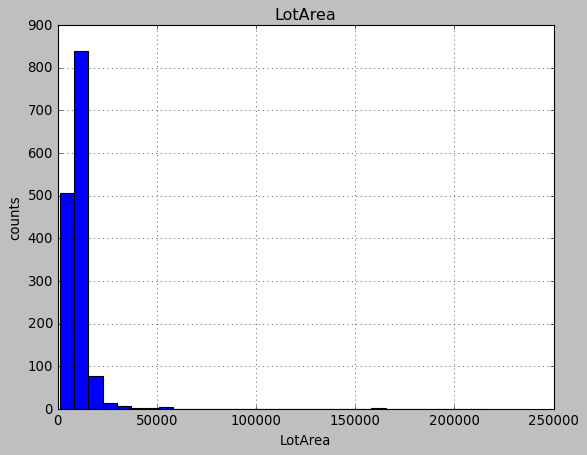

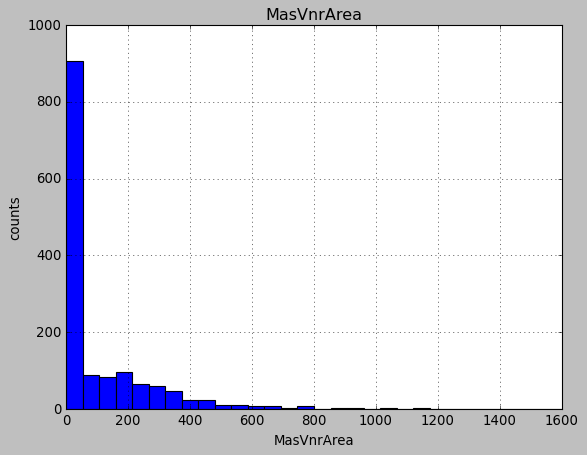

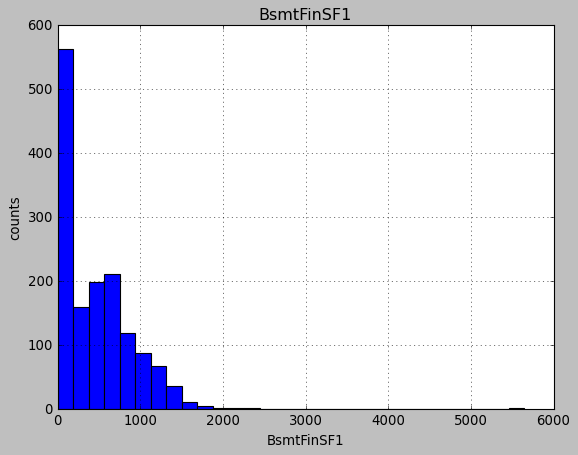

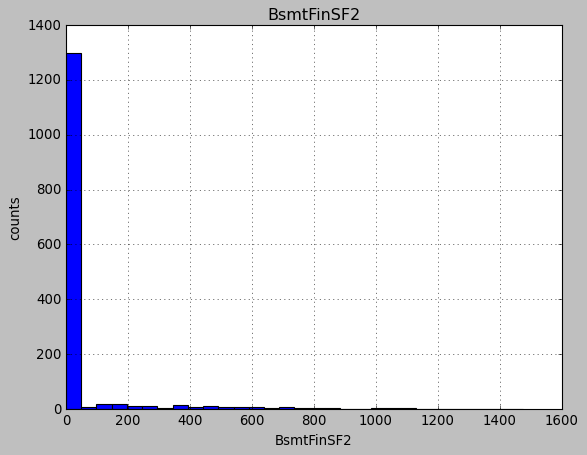

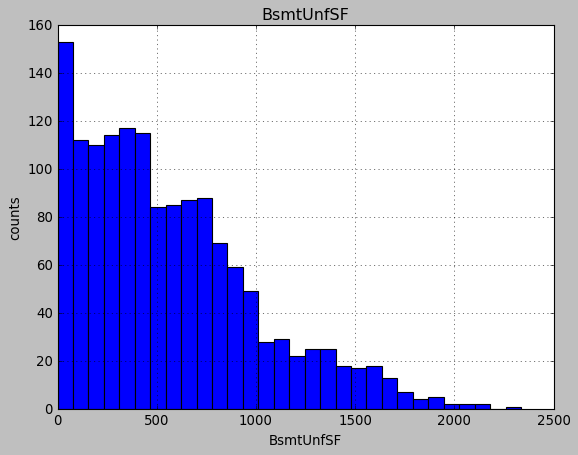

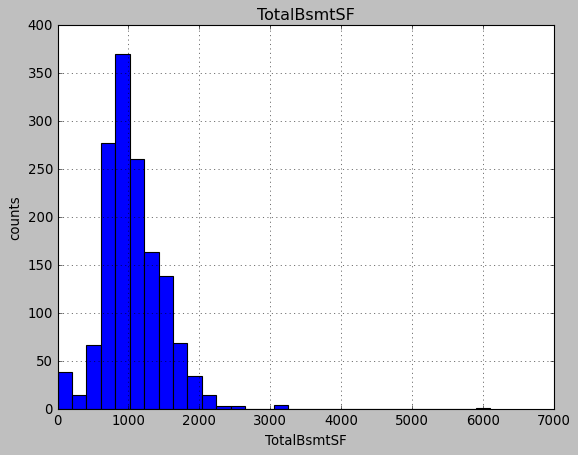

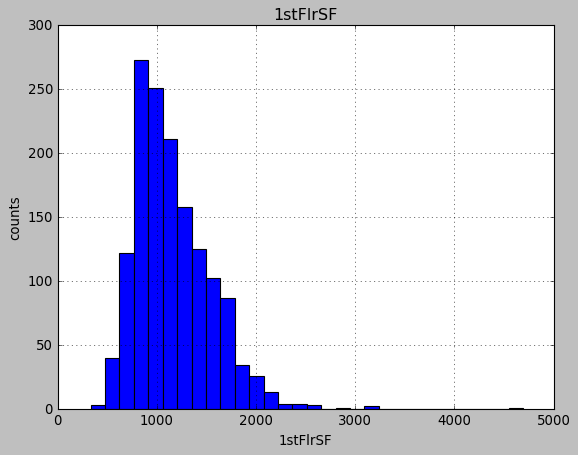

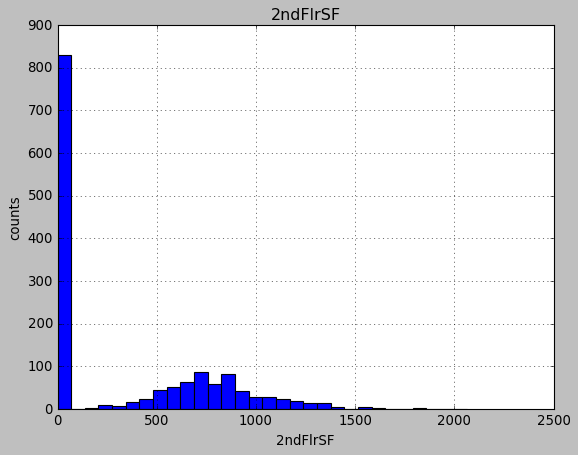

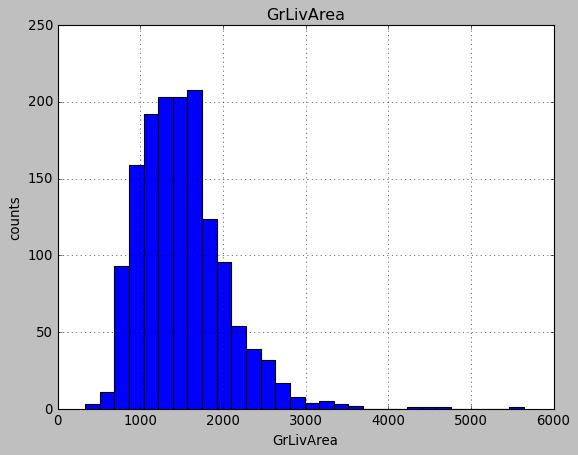

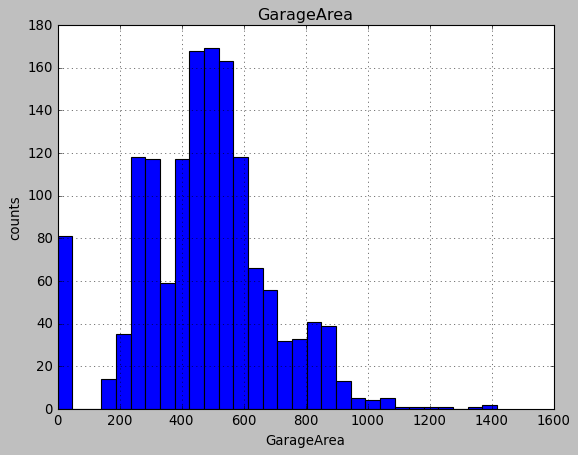

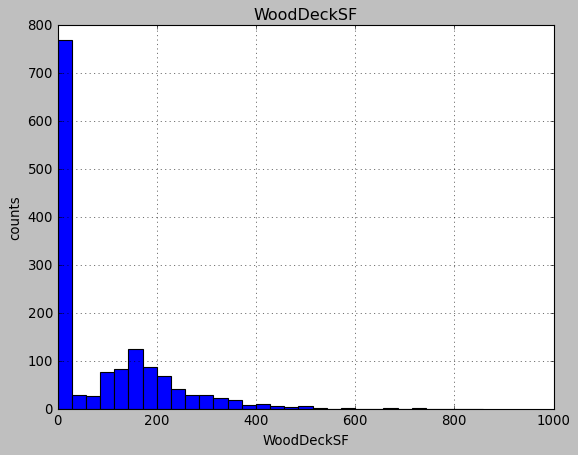

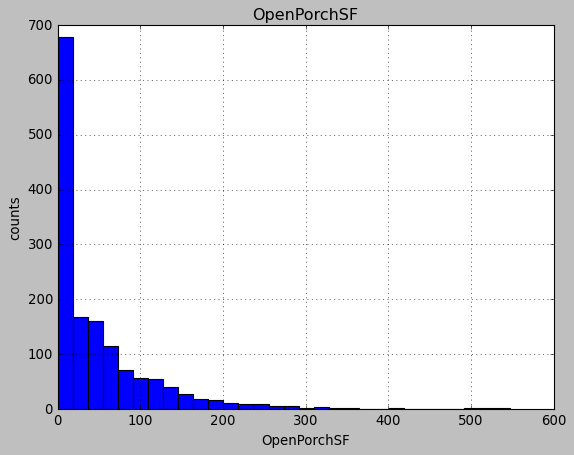

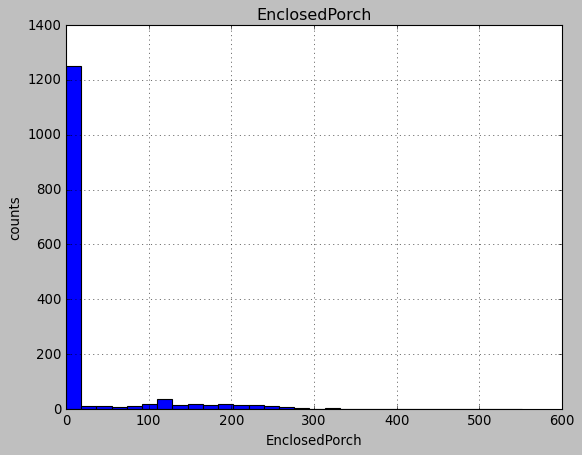

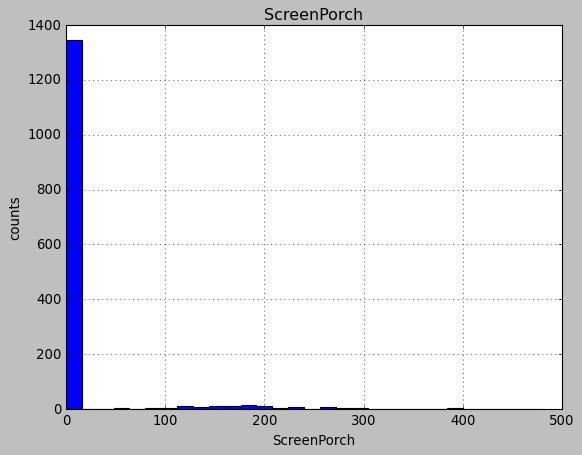

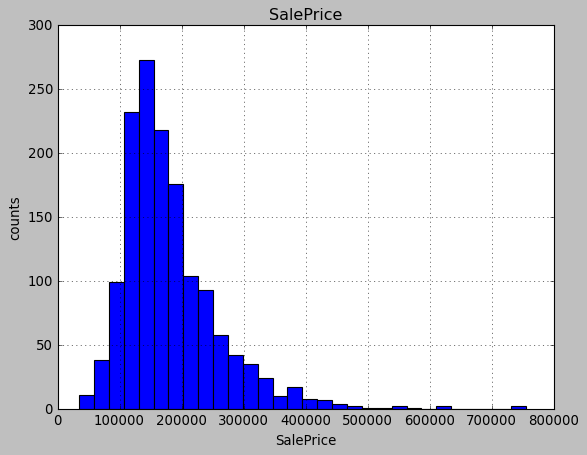

In [12]:
for feature in continuos_features:
    data = train.copy(feature)
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.title(feature)
    plt.show()

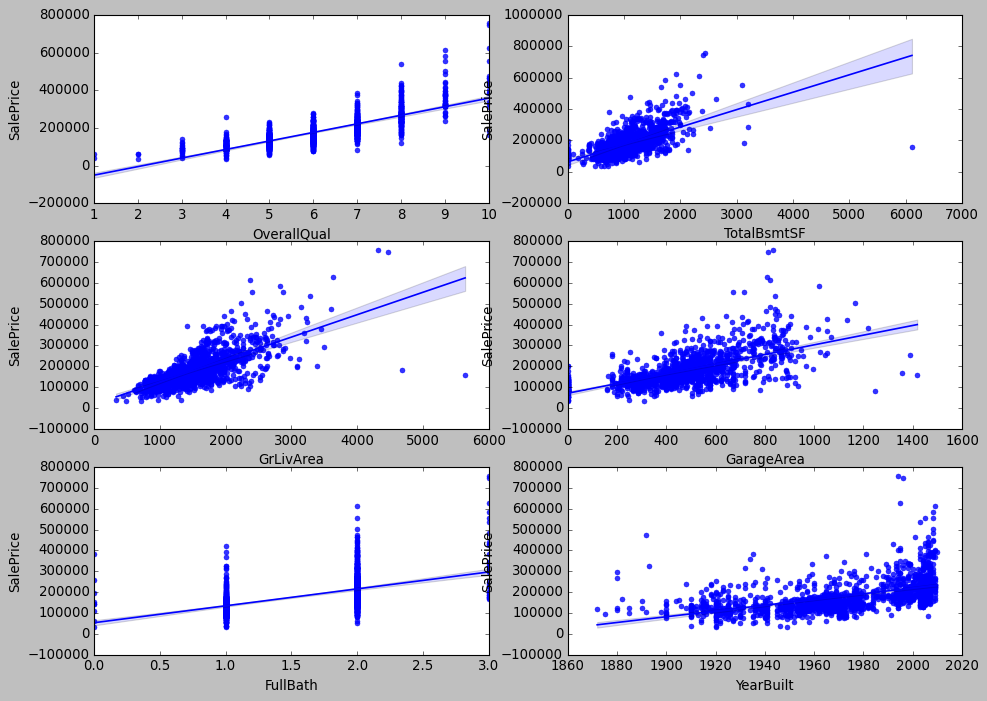

In [14]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))
OverallQual_scatter_plot=pd.concat([train['SalePrice'],train['OverallQual']],axis=1)
sns.regplot(x='OverallQual',y='SalePrice',data=OverallQual_scatter_plot,fit_reg=True,scatter=True,ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=TotalBsmtSF_scatter_plot,fit_reg=True,scatter=True,ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y='SalePrice',data=GrLivArea_scatter_plot,fit_reg=True,scatter=True,ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

In [19]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

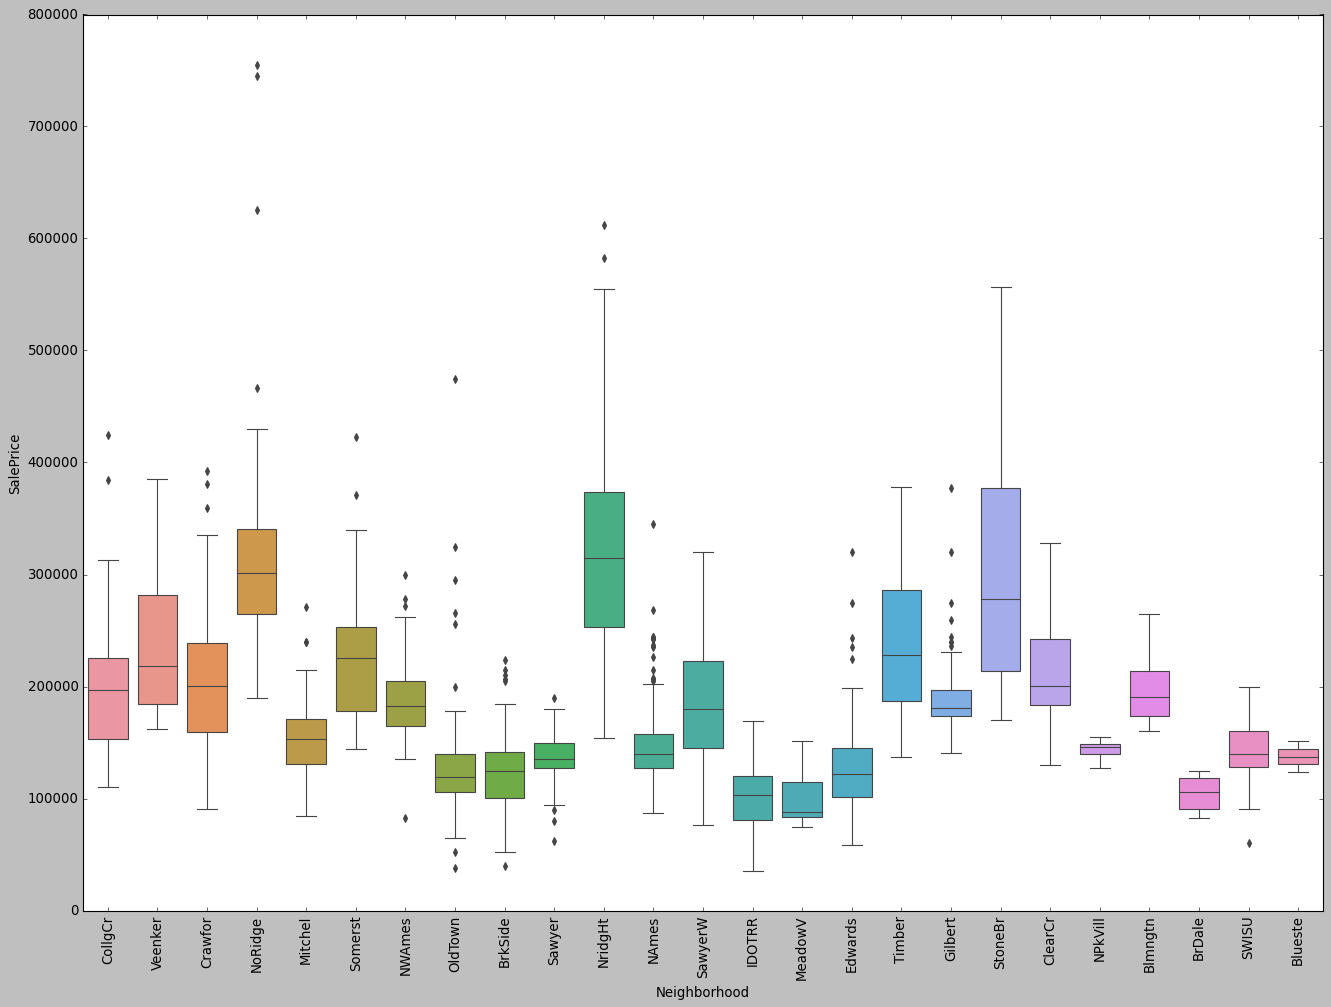

In [23]:
plt.figure(figsize=(20,14))
sns.boxplot(x='Neighborhood',y='SalePrice',data=train)
plt.xticks(rotation=90)

In [31]:
#def boxplot(x,y,**kwargs):
 #   sns.boxplot(x=x,y=y)
  #  x = plt.xticks(rotation=90)
    
#f=pd.melt(train,id_vars=['SalePrice'],value_vars=categorical_features)
#g=sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False,sharey=False)
#g=g.map(boxplot,'value','SalePrice')
#plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

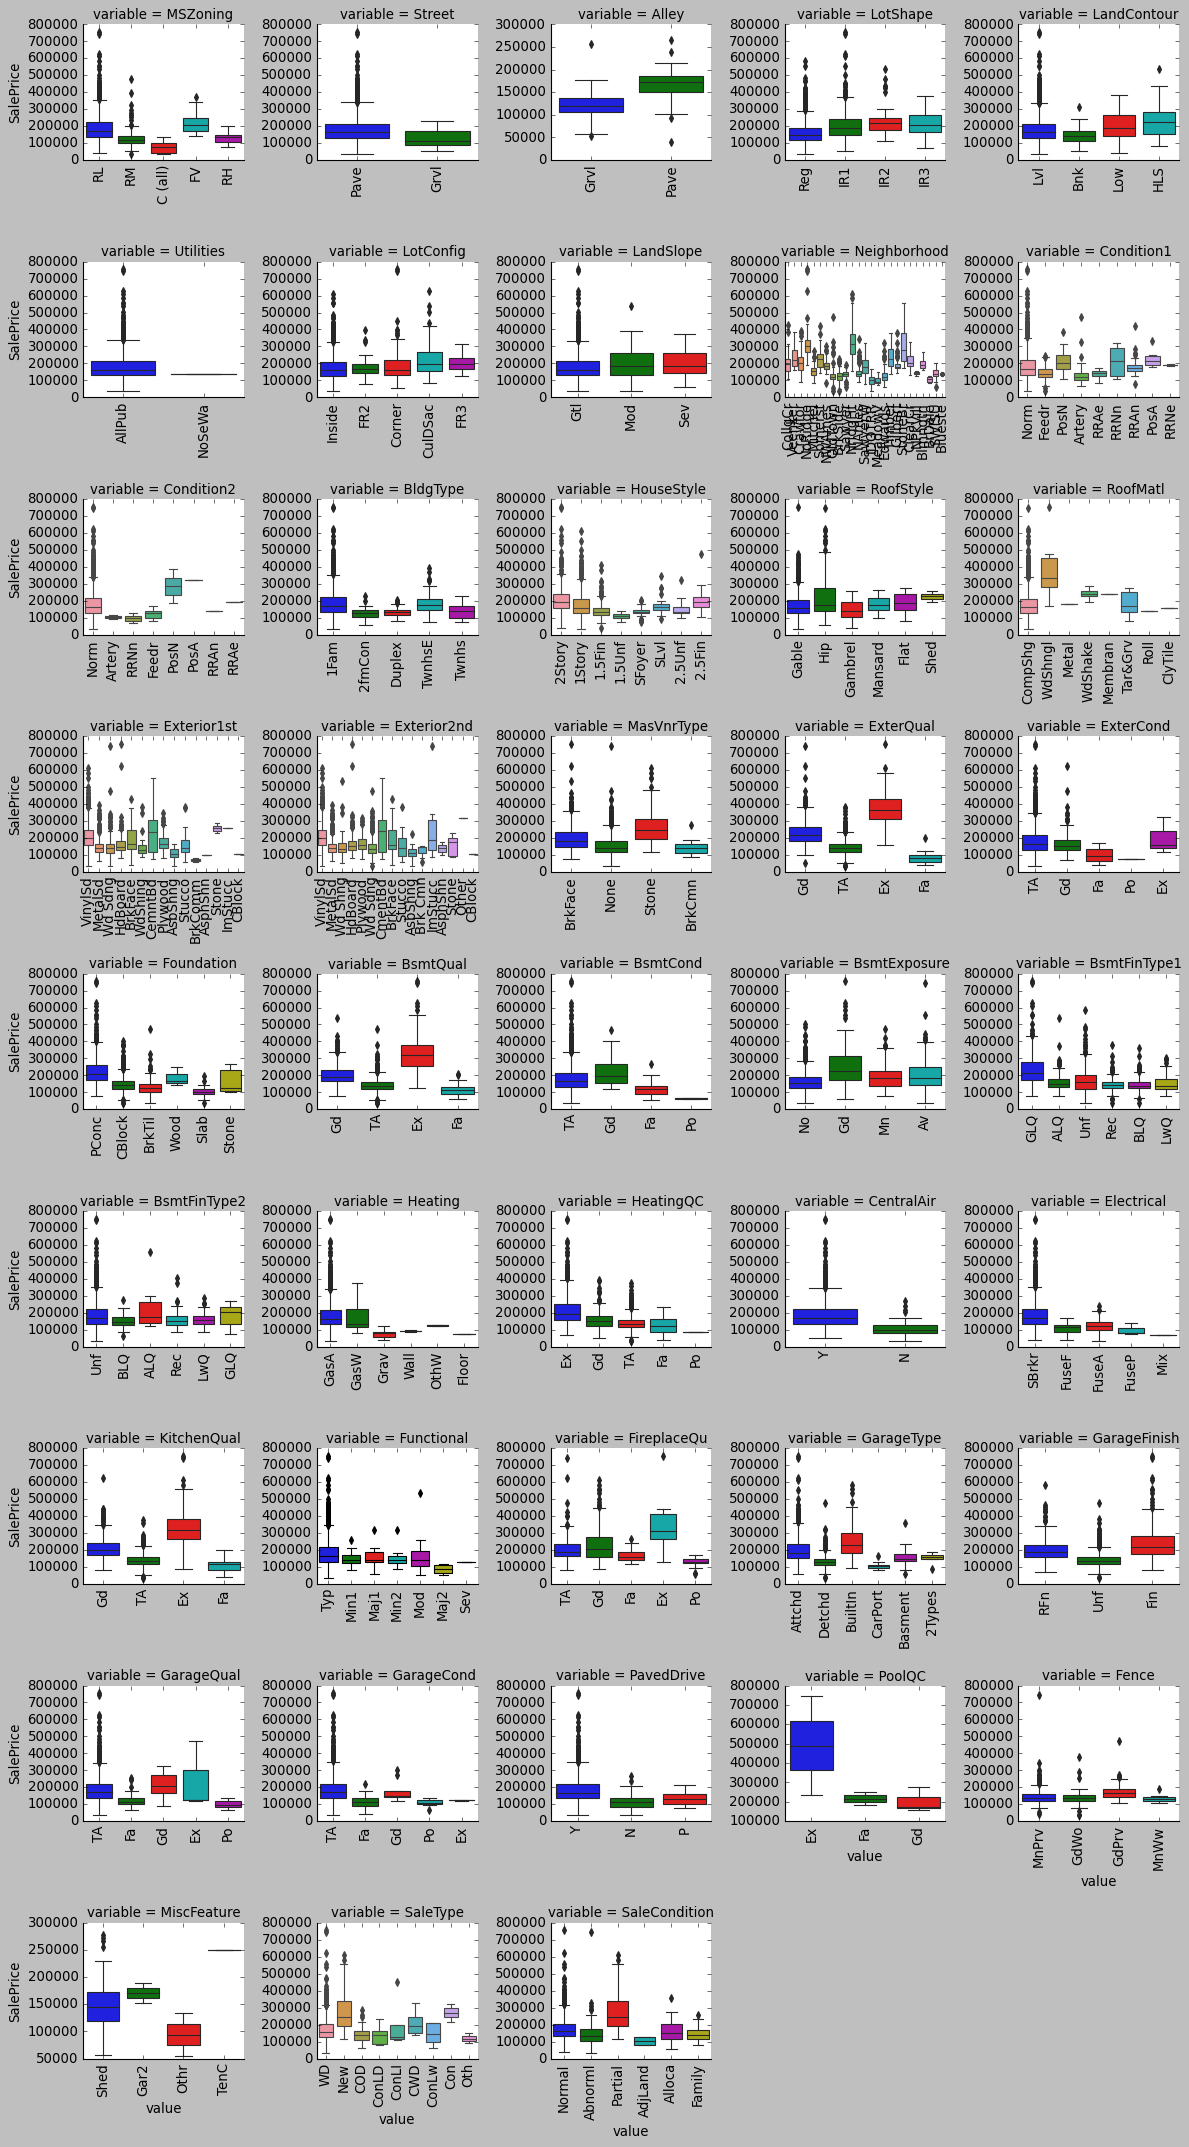

In [33]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)


f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_features)#check the output using f.head()
g = sns.FacetGrid(f, col="variable",  col_wrap=5,sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")
plt.xticks(rotation=90)

In [37]:
correlation=train.corr()

In [39]:
k=15
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


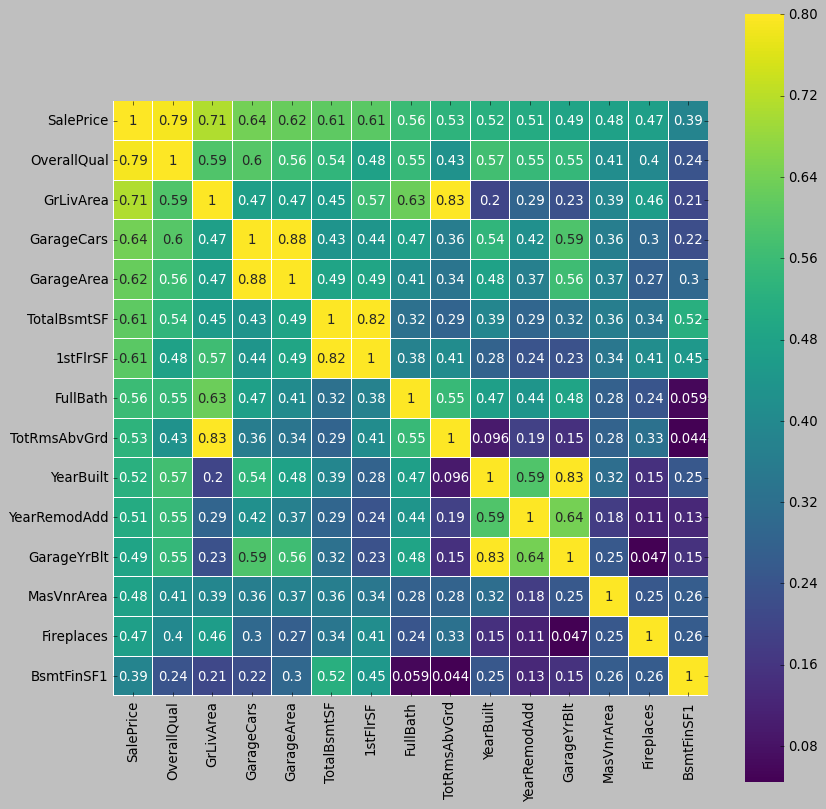

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(train[cols].corr(),annot=True,vmax=.8,linewidths=0.01,square=True,cmap='viridis',linecolor='white')
plt.show()

In [45]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_values.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [46]:
df = train

df.dropna(axis=1,inplace=True,thresh=300)

print('No of Columns:' + str(len(df.columns)))

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


print('No of rows:' +str(len(df)))

No of Columns:76
              Total   Percent
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685
YearBuilt         0  0.000000
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
ExterQual         0  0.000000
ExterCond         0  0.000000
No of rows:1460


In [47]:
test=test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [48]:
df.dropna(how='any', subset=['MasVnrArea', 'MasVnrType', 'Electrical'], inplace = True)
print('No. of rows:' +str(len(df)))

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

No. of rows:1451
              Total   Percent
FireplaceQu     685  0.472088
LotFrontage     257  0.177119
GarageCond       81  0.055824
GarageType       81  0.055824
GarageYrBlt      81  0.055824
GarageFinish     81  0.055824
GarageQual       81  0.055824
BsmtExposure     38  0.026189
BsmtFinType2     38  0.026189
BsmtFinType1     37  0.025500
BsmtCond         37  0.025500
BsmtQual         37  0.025500
LotConfig         0  0.000000
LandSlope         0  0.000000
BsmtFinSF1        0  0.000000
MSZoning          0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000
MasVnrArea        0  0.000000


In [49]:
categorical_features = df.select_dtypes(include = np.object)
categorical_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
for feature in categorical_features:
  df.fillna('0', inplace = True)
  test.fillna('0', inplace = True)


total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

               Total  Percent
SalePrice          0      0.0
Foundation         0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
MasVnrArea         0      0.0
ExterQual          0      0.0
ExterCond          0      0.0
BsmtQual           0      0.0
SaleCondition      0      0.0
BsmtCond           0      0.0
BsmtExposure       0      0.0
BsmtFinType1       0      0.0
BsmtFinSF1         0      0.0
BsmtFinType2       0      0.0
BsmtFinSF2         0      0.0
BsmtUnfSF          0      0.0
RoofStyle          0      0.0
YearRemodAdd       0      0.0


In [52]:
numeric_features = df.select_dtypes(include=[np.number])

In [53]:
date_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]

for feature in date_feature:
  df[feature].fillna(df[feature].mode()[0],inplace=True)

In [54]:
discrete_feature = [ feature for feature in numeric_features if len(train[feature].unique()) < 25 
                    and feature not in date_feature + ['Id']]

for feature in date_feature:
  df[feature].fillna(df[feature].mode()[0],inplace=True)

In [55]:
continious_feature = [ feature for feature in numeric_features if feature not in date_feature + discrete_feature + ['Id']]

for feature in continious_feature:
  df[feature].fillna(df[feature].mean(),inplace=True)


In [56]:
print('No. of rows:' +str(len(df)))
print('No. of columns:' +str(len(df.columns)))

No. of rows:1451
No. of columns:76


In [57]:
train = df
print(train.shape)
print(test.shape)

(1451, 76)
(1459, 75)


In [58]:
num_train=train[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]
num_test=test[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]
print(num_train.shape)
print(num_test.shape)
numerical_categorical_feature=c = pd.concat((num_train,num_test),sort=False)
print(numerical_categorical_feature.shape)
numerical_categorical_feature=numerical_categorical_feature.astype('O')

(1451, 49)
(1459, 49)
(2910, 49)


In [59]:
numerical_categorical_feature = pd.get_dummies(numerical_categorical_feature)
num_train_dummy =numerical_categorical_feature[:1451]
num_test_dummy = numerical_categorical_feature[1451:]
print(num_train_dummy.shape)
print(num_test_dummy.shape)

(1451, 317)
(1459, 317)


In [60]:
train=train.drop(['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis=1)

test=test.drop(['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis=1)

print(train.shape)
print(test.shape)


(1451, 27)
(1459, 26)


In [62]:
final_train =train.merge(num_train_dummy,left_index=True,right_index=True)
final_test = test.merge(num_test_dummy,left_index=True,right_index=True)

print(final_train.shape)
print(final_test.shape)

(1451, 344)
(1459, 343)


In [63]:
from sklearn.model_selection import train_test_split

X = final_train.drop('SalePrice',axis=1)
y = final_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
from sklearn.model_selection import train_test_split

X = final_train.drop('SalePrice',axis=1)
y = final_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
predictions = dtree.predict(final_test)

In [ ]:
sub=pd.DataFrame()
sub['Id'] =test_Id
sub['SalePrice'] = predi